Importing all the data into dataframes

#  Importing into data frames with proper encoding

In [76]:
import pandas as pd

companies = pd.read_csv("companies.csv",encoding='ISO-8859-1')
rounds = pd.read_csv("rounds2.csv",encoding='ISO-8859-1')
mappings= pd.read_csv("mapping.csv",encoding='ISO-8859-1')



# Unique Companies

In [77]:
d = companies['permalink'].unique()
d.shape

(66368,)

# Convert Company Link To Lower Case since we need to merge

In [78]:
rounds['company_permalink'] = rounds['company_permalink'].str.lower()
companies['permalink'] = companies['permalink'].str.lower()

# Merge the two data sets and Take the count

In [79]:
master_frame = pd.merge(rounds,companies, how='inner', left_on='company_permalink',right_on='permalink')
master_frame.count()

company_permalink          114942
funding_round_permalink    114942
funding_round_type         114942
funding_round_code          31139
funded_at                  114942
raised_amount_usd           94958
permalink                  114942
name                       114941
homepage_url               108810
category_list              111535
status                     114942
country_code               106271
state_code                 104003
region                     104782
city                       104785
founded_at                  94422
dtype: int64

# Representative Amount for Venture Funding Type
remove zero values to get the right mean. In Lectures, S Anand talked about mean vs median for representative type. I have taken mean since the values are evenly spread and the outliers are pretty less

In [80]:
rounds_ven = rounds[rounds['funding_round_type']=='venture']
#rounds_ven = rounds_ven[rounds_ven['raised_amount_usd']>0]
rounds_reps_amount = rounds_ven['raised_amount_usd'].median()
rounds_reps_amount = rounds_ven['raised_amount_usd'].mean()
#rounds_reps_amount = rounds_ven['raised_amount_usd'].mean()
rounds_reps_amount

11748949.129489528

Representative Amount for Angel Funding Type

In [81]:
rounds_ven = rounds[rounds['funding_round_type']=='angel']
#rounds_ven = rounds_ven[rounds_ven['raised_amount_usd']>0]
rounds_reps_amount = rounds_ven['raised_amount_usd'].median()
rounds_reps_amount = rounds_ven['raised_amount_usd'].mean()
#rounds_reps_amount = rounds_ven['raised_amount_usd'].mean()
rounds_reps_amount

958694.4697530865

# Representative Amount for Angel Funding Type

In [82]:
rounds_ven = rounds[rounds['funding_round_type']=='seed']
#remvoing all the values zero investmenet as we cannot predict the investment
rounds_ven = rounds_ven[rounds_ven['raised_amount_usd']>0]
#rounds_reps_amount = rounds_ven['raised_amount_usd'].median()
rounds_reps_amount = rounds_ven['raised_amount_usd'].mean()
rounds_reps_amount

722726.9091798536

# Representative Amount for private_equity

In [83]:
rounds_ven = rounds[rounds['funding_round_type']=='private_equity']
#rounds_ven = rounds_ven[rounds_ven['raised_amount_usd']>0]
rounds_reps_amount = rounds_ven['raised_amount_usd'].median()
rounds_reps_amount = rounds_ven['raised_amount_usd'].mean()
#rounds_reps_amount = rounds_ven['raised_amount_usd'].mean()
rounds_reps_amount

73308593.02944215

# Round for investing between 5 million to 15 millon including

In [84]:
# Group by funding round type and the caluclate median as aggregation function
round_fund_grp_by = rounds.groupby(['funding_round_type'])['raised_amount_usd'].median()
round_fund_grp_by

funding_round_type
angel                      400000.0
convertible_note           272000.0
debt_financing            1100000.0
equity_crowdfunding        100000.0
grant                      201684.0
non_equity_assistance       60000.0
post_ipo_debt            19950000.0
post_ipo_equity          12262852.5
private_equity           20000000.0
product_crowdfunding       183915.0
secondary_market         32600000.0
seed                       275000.0
undisclosed               1018680.0
venture                   5000000.0
Name: raised_amount_usd, dtype: float64

## Filter between 5 to 15 mil

In [85]:
#round_fund_grp_by_data = round_fund_grp_by.where((round_fund_grp_by>=5000000.0 & round_fund_grp_by<=15000000.0), inplace=True) 
# TODO need to figure out whye above is not working
round_fund_grp_by_data = round_fund_grp_by[(round_fund_grp_by>=5000000.0)]
round_fund_grp_by_data = round_fund_grp_by_data[round_fund_grp_by_data<=15000000.0]
round_fund_grp_by_data

funding_round_type
post_ipo_equity    12262852.5
venture             5000000.0
Name: raised_amount_usd, dtype: float64

# Removing Zero Value to get the accurate numbers in investmement.
# Assumption -  If raised_amount_usd == 0, no investment has been made effectively.

In [86]:
rounds_non_zero = rounds # rounds[rounds['raised_amount_usd']>0]
rounds_non_zero

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/ãasys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


# Merging the data sets for next set of enhancements

In [87]:
company_data_country = rounds_non_zero.merge(companies, left_on='company_permalink',right_on='permalink')
company_data_country

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114937,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114938,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114939,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
114940,/organization/ãasys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0,/organization/ãasys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [88]:
company_data_country_grped = company_data_country.groupby(['country_code'])['raised_amount_usd'].sum()
type(company_data_country_grped)

pandas.core.series.Series

# Finding top 3 countries english speaking countries for investement

In [89]:
import numpy as np
company_data_country_grped_sorted = company_data_country_grped.sort_values(ascending=False)
top9  = company_data_country_grped_sorted.apply(np.int64).head(9)
top9 

#China is not English speaking country according to the wikipedia page.

country_code
USA    669482123821
CHN     75703565796
GBR     32767048060
IND     27686336560
CAN     18424675109
RUS     11279120120
DEU     10017763740
ISR      9713884650
FRA      9059770757
Name: raised_amount_usd, dtype: int64

# Add the first primary category i.e. the first category among many

In [90]:
company_data_country['primary_category_list'] = company_data_country['category_list'].str.split("|").str[0]
company_data_country  = company_data_country[company_data_country['raised_amount_usd']>0]

# Create a Dictionary of category to sector for optimal usage

In [91]:
mappings= pd.read_csv("mapping.csv",encoding='latin1')
# Ignoring nan value
mappings = mappings[~mappings['category_list'].isnull()]
mappings

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


# Iterating and Creating a Dictionary for category_type to sector mapping

In [92]:
from collections import defaultdict
category_to_sector = {}
#print(mappings.columns)
#Get the sector row from the mappings column
def getSector(row):
    for col_name in mappings.columns:
        #print(col_name)
        if(row[col_name]==1):
            return col_name
        
    return ''
#iteareate over each row to  create a dictonary of cateogry to sector
for index, row in mappings.iterrows():
    category_type = row['category_list']
    sector_name = getSector(row)
    # category_to_sector[category_type].append(sector_name)
    category_to_sector.update({category_type:sector_name})
    
category_to_sector
    
    

{'3D': 'Manufacturing',
 '3D Printing': 'Manufacturing',
 '3D Technology': 'Manufacturing',
 'Accounting': 'Social, Finance, Analytics, Advertising',
 'Active Lifestyle': 'Health',
 'Ad Targeting': 'Social, Finance, Analytics, Advertising',
 'Advanced Materials': 'Manufacturing',
 'Adventure Travel': 'Automotive & Sports',
 'Advertising': 'Social, Finance, Analytics, Advertising',
 'Advertising Exchanges': 'Social, Finance, Analytics, Advertising',
 'Advertising Networks': 'Social, Finance, Analytics, Advertising',
 'Advertising Platforms': 'Social, Finance, Analytics, Advertising',
 'Advice': 'Others',
 'Aerospace': 'Automotive & Sports',
 'Agriculture': 'Manufacturing',
 'Air Pollution Control': 'Cleantech / Semiconductors',
 'Algorithms': 'Others',
 'All Markets': 'Others',
 'All Students': 'Others',
 'Alter0tive Medicine': 'Health',
 'Alumni': 'Others',
 'A0lytics': 'Social, Finance, Analytics, Advertising',
 'Android': 'Social, Finance, Analytics, Advertising',
 'Angels': 'Others'

# Some of the categories are unmarked so have marked it as undefined for now.

In [93]:
company_data_country['sector'] = company_data_country.apply(lambda row: category_to_sector[row['primary_category_list']] if row['primary_category_list'] in category_to_sector  else 'undefined',
axis=1)
company_data_country

<ipython-input-93-be3ecea8c262>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data_country['sector'] = company_data_country.apply(lambda row: category_to_sector[row['primary_category_list']] if row['primary_category_list'] in category_to_sector  else 'undefined',


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_category_list,sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms,"News, Search and Messaging"
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,Apps,"News, Search and Messaging"
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web,"News, Search and Messaging"
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,Games,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114936,/organization/zzzzapp-com,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,NaN,01-08-2013,33149.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,Advertising,"Social, Finance, Analytics, Advertising"
114937,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,Advertising,"Social, Finance, Analytics, Advertising"
114938,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,Advertising,"Social, Finance, Analytics, Advertising"
114940,/organization/ãasys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0,/organization/ãasys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014,Consumer Electronics,Manufacturing


# Country wise filtering from top3 english speaking countries found

In [94]:
company_data_country_sectorwise_usa = company_data_country[company_data_country.country_code=='USA']
company_data_country_sectorwise_gbr = company_data_country[company_data_country.country_code=='GBR']
company_data_country_sectorwise_ind = company_data_country[company_data_country.country_code=='IND']


company_data_country_sectorwise_usa['raised_amount_usd'].describe().apply(np.int64)
#company_data_country_sectorwise_gbr['raised_amount_usd'].describe().apply(np.int64)
#company_data_country_sectorwise_ind['raised_amount_usd'].describe().apply(np.int64)

#company_data_country_sectorwise_usa_count

count          61770
mean        10838305
std        124812417
min                1
25%           500000
50%          2100000
75%          8000000
max      21271935000
Name: raised_amount_usd, dtype: int64

# USA Investment

In [95]:
company_data_country_sectorwise_usa['raised_amount_usd'].sum()

669482123821.0

# GBR Investment

In [96]:
company_data_country_sectorwise_gbr['raised_amount_usd'].sum()

32767048060.0

# India Investment

In [97]:
company_data_country_sectorwise_ind['raised_amount_usd'].describe().sum()

1602073101.0471692

Top Sector Name US 
# No of investments are considered if they are greater than 0

In [98]:
company_data_country_sectorwise_usa_count = company_data_country_sectorwise_usa.groupby(['sector']).count()
company_data_country_sectorwise_usa_count['country_code'].sort_values(ascending=False)

sector
Others                                     13706
Cleantech / Semiconductors                 11421
Social, Finance, Analytics, Advertising     9803
News, Search and Messaging                  7986
Health                                      5351
undefined                                   4855
Manufacturing                               4036
Entertainment                               3525
Automotive & Sports                         1087
Name: country_code, dtype: int64

Top Sector Name GBR

In [99]:
company_data_country_sectorwise_gbr_count = company_data_country_sectorwise_gbr.groupby(['sector']).count()
company_data_country_sectorwise_gbr_count['country_code'].sort_values(ascending=False)

sector
Others                                     1143
Social, Finance, Analytics, Advertising     958
News, Search and Messaging                  733
Cleantech / Semiconductors                  677
Entertainment                               423
undefined                                   415
Manufacturing                               290
Health                                      253
Automotive & Sports                         121
Name: country_code, dtype: int64

Top Sector Name IND

In [100]:
company_data_country_sectorwise_ind_count = company_data_country_sectorwise_ind.groupby(['sector']).count()
company_data_country_sectorwise_ind_count['country_code'].sort_values(ascending=False)

sector
Others                                     526
News, Search and Messaging                 275
Social, Finance, Analytics, Advertising    216
Entertainment                              150
undefined                                  142
Manufacturing                               95
Cleantech / Semiconductors                  93
Health                                      83
Automotive & Sports                         60
Name: country_code, dtype: int64

Company From Top Sector Wise Count - USA

In [101]:
company_data_country_sectorwise_usa_others = company_data_country_sectorwise_usa[company_data_country_sectorwise_usa['sector']=='Others'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False)
company_data_country_sectorwise_usa_others.apply(np.int64,0)



company_permalink
/organization/facebook                       2425700000
/organization/zebra-technologies             2000000000
/organization/quad-graphics                  1900000000
/organization/social-finance                 1766199900
/organization/venari-resources               1498515340
                                                ...    
/organization/bryansbiz-com                         600
/organization/bella-professional-services           500
/organization/cmilligan-investments                 300
/organization/skytechnica-framework                 232
/organization/snapstream                             50
Name: raised_amount_usd, Length: 7486, dtype: object

# Company From Second Top Sector Wise Count - USA

In [102]:
company_data_country_sectorwise_usa_others = company_data_country_sectorwise_usa[company_data_country_sectorwise_usa['sector']=='Cleantech / Semiconductors'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False)
company_data_country_sectorwise_usa_others.apply(np.int64,0)

company_permalink
/organization/freescale                       17600000000
/organization/carestream-health                2400000000
/organization/terra-gen-power                  1200000000
/organization/cape-wind                        1200000000
/organization/juno-therapeutics                1159803496
                                                 ...     
/organization/gigawatt-farms                         3000
/organization/bradshaw-propulsion                    3000
/organization/canfield-medical-supply                2750
/organization/uranium-recovery-corporation           2000
/organization/protein-lounge                         1000
Name: raised_amount_usd, Length: 4742, dtype: object

# Company From Top Sector Wise Count - GBR

In [103]:
company_data_country_sectorwise_gbr_others = company_data_country_sectorwise_gbr[company_data_country_sectorwise_gbr['sector']=='Others'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False)
company_data_country_sectorwise_gbr_others.apply(np.int64,0)


company_permalink
/organization/helios-towers-africa                630000000
/organization/g4s                                 541000000
/organization/oneweb                              500000000
/organization/university-of-ulster                477475356
/organization/seven-energy                        255000000
                                                    ...    
/organization/westbridge-2                            13000
/organization/communication-specialist-limited        10500
/organization/enterprise-data-safe-ltd                 9542
/organization/naturebytes                              9370
/organization/posh-eyes                                3620
Name: raised_amount_usd, Length: 732, dtype: object

# Company From Second Top Sector Wise Count - GBR

In [104]:
company_data_country_sectorwise_gbr_others = company_data_country_sectorwise_gbr[company_data_country_sectorwise_gbr['sector']=='Social, Finance, Analytics, Advertising'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False)
company_data_country_sectorwise_gbr_others.apply(np.int64,0)

company_permalink
/organization/powa-technologies     176700000
/organization/worldremit            147655000
/organization/wonga                 145393366
/organization/shire-leasing         129104098
/organization/mereo                 119000000
                                      ...    
/organization/warstuff                   3600
/organization/maplace-co                 1553
/organization/twenty5media               1506
/organization/saunders-solutions          100
/organization/bemyspot-ltd                100
Name: raised_amount_usd, Length: 566, dtype: object

# Company From Top Sector Wise Count - IND

In [105]:
company_data_country_sectorwise_ind_others = company_data_country_sectorwise_ind[company_data_country_sectorwise_ind['sector']=='Others'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False)
company_data_country_sectorwise_ind_others.apply(np.int64,0)

company_permalink
/organization/flipkart                  3151140000
/organization/snapdeal                  1897699998
/organization/paytm                      700000000
/organization/piramal-realty             434000000
/organization/tata-teleservices          212000000
                                           ...    
/organization/sky-level-enterprieses          5000
/organization/barter-li                       2500
/organization/regrob-com                      2000
/organization/bookingarena                    1883
/organization/koshimbir-com                   1669
Name: raised_amount_usd, Length: 369, dtype: object

# Company From Top Sector Wise Count - IND

In [106]:
company_data_country_sectorwise_ind_others = company_data_country_sectorwise_ind[company_data_country_sectorwise_ind['sector']=='News, Search and Messaging'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False)
company_data_country_sectorwise_ind_others.apply(np.int64,0)

company_permalink
/organization/one97-communications                           585000000
/organization/act-atria-convergence-technologies-pvt-ltd-    500000000
/organization/quikr-india                                    346000000
/organization/tower-vision                                   300000000
/organization/freecharge                                     113000000
                                                               ...    
/organization/igadget-asia                                       10000
/organization/mobileveda                                          9000
/organization/blue-box-media-private-limited                      8217
/organization/techieweb-solutions-2                               5000
/organization/ruralserver                                          569
Name: raised_amount_usd, Length: 195, dtype: object

# Plotting the Chart -  Check Point 6

# Funds Suited for Spark Funds  - 5 million to 15 millon

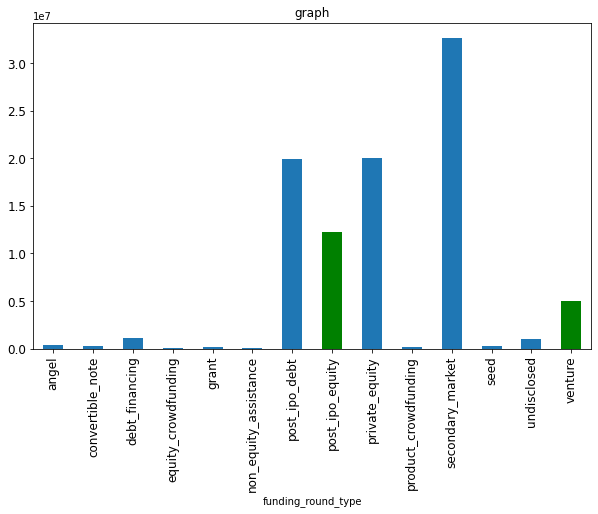

In [107]:
import seaborn as sns
import matplotlib.pyplot  as plt
plot_data= round_fund_grp_by.plot(kind='bar', title ="graph", figsize=(10, 6), fontsize=12)
eligble_venture_types = ["post_ipo_equity","venture"]
for ticks in plot_data.xaxis.get_major_ticks():
    if ticks.label1.get_text() in eligble_venture_types:
        plot_data.patches[round_fund_grp_by.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('g')
plt.show()
#round_fund_grp_by

# Since we need Engilsh Speaking Countries need to be highlighted

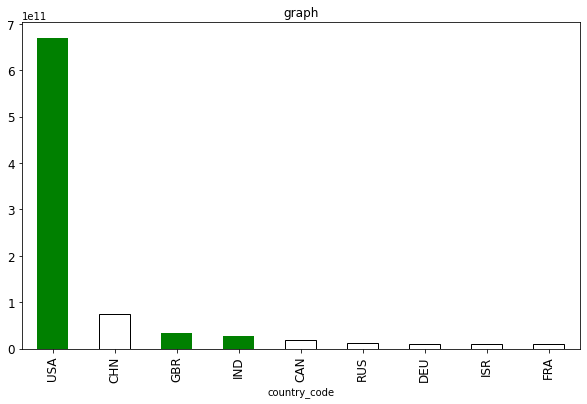

In [108]:
plot_data = top9.plot(kind='bar', title ="graph", figsize=(10, 6), fontsize=12)
top3countries = ["USA","GBR","IND"]
for ticks in plot_data.xaxis.get_major_ticks():
    if ticks.label1.get_text() not in top3countries:
        #ticks.label1.set_visible(False)
        plot_data.patches[top9.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('w')
        plot_data.patches[top9.index.get_indexer([ticks.label1.get_text()])[0]].set_edgecolor('black')
    else:
        plot_data.patches[top9.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('g')
        
plt.show()

# This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3

In [109]:
# Since Spark funds wants to invest in top 3 countries, the results from above data set can be used.
company_data_country_top3 = company_data_country[company_data_country.country_code.isin(["USA","GBR","IND"])]

In [110]:
company_data_country_top3_sectorwise = company_data_country_top3.groupby(["country_code","sector"])['company_permalink'].count()
company_data_country_grp_frame = company_data_country_top3_sectorwise.to_frame()

company_data_country_grp_frame = company_data_country_grp_frame.reset_index()

# First get the data from different countries
gbr = company_data_country_grp_frame[company_data_country_grp_frame['country_code']=='GBR']
usa = company_data_country_grp_frame[company_data_country_grp_frame['country_code']=='USA']
ind = company_data_country_grp_frame[company_data_country_grp_frame['country_code']=='IND']

# Get the top 3 and then create a separate data frame
gbr = gbr.sort_values(by="company_permalink",ascending=False).head(3)
usa = usa.sort_values(by="company_permalink",ascending=False).head(3)
ind = ind.sort_values(by="company_permalink",ascending=False).head(3)

appended_dp = gbr.append([usa,ind])
appended_dp.reset_index()

# Now Pivot the table to make the data ready for stacked bar chart or multiple bar charts
pivot_data=appended_dp.pivot_table(index="country_code",columns="sector",values="company_permalink")
pivot_data.fillna(0)

sector,Cleantech / Semiconductors,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
country_code,,,,
GBR,0.0,733.0,1143.0,958.0
IND,0.0,275.0,526.0,216.0
USA,11421.0,0.0,13706.0,9803.0


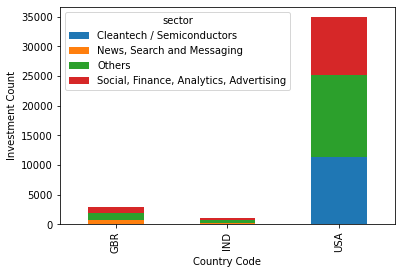

In [111]:
pivot_data.plot(kind="bar",stacked=True)
plt.xlabel("Country Code")
plt.ylabel("Investment Count")
plt.show()

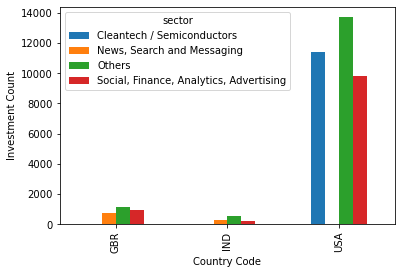

In [112]:
pivot_data.plot(kind="bar")
plt.xlabel("Country Code")
plt.ylabel("Investment Count")
plt.show()